<h1>Missing values + outliers - Detection and Treatment + MORE 😁.</h1>

<h2>Dataset Description </h2>
<p> There are many factors that describe the income of person, like age, education, occupation, comfort etc. That datset which we are going to use today is <b>Adult Income Dataset</b>. </p>
    <li><b> There are 15 attributes of this dataset. They are</b></li>
    <ol>
    <li>age
    <li>workclass
    <li>fnlwgt
    <li>education
    <li>educational-num
    <li>marital-status
     <li>occupation
    <li>relationship
     <li>race
     <li>gender
     <li>capital-gain
     <li>capital-loss
     <li>hours-per-week
     <li>native-country
     <li>income
      <p>Many of the columns contains <b>'?'</b> as the missing value. We are going to replace it with the np.nan to make our process smooth. After that we do some EDA and treatment of outliers. Column 'Income' is our targeted output column and all the other attributes will act as a factor for it. Using some ML algorithms we are going to predict the income weather a person income is less than 50k or greater than 50k.</p>
         <p><b> Thank you for reading..It code time </b></p>

<h3>Import all important modules</h3>

In [1]:
import numpy as np
import pandas as pd
import sklearn as s
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
sns.set(color_codes=True)

In [2]:
#load datset
data=pd.read_csv('adult.csv')

In [3]:
#data description
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#information about each attributes of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# replacing all missing values with NAN values
data.replace('?',np.nan,inplace=True)

In [6]:
# columns in the dataset
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
#finding nulls in the dataset
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
data_copy=data.copy()

<p> Only three columns 'workclass', 'occupation', 'native-country' have the missing values</p>


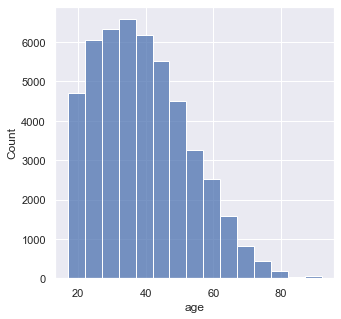

In [9]:
sns.histplot(data['age'],bins=15,binwidth=5)
plt.show()

<AxesSubplot:xlabel='age'>

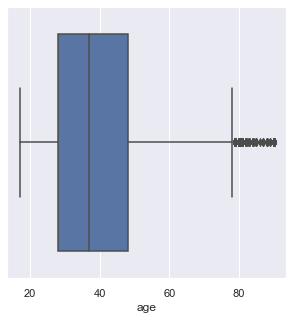

In [10]:
sns.boxplot(x=data['age'])

<p> Age after 80 is outlier for the age attributes</p>

<AxesSubplot:xlabel='count', ylabel='workclass'>

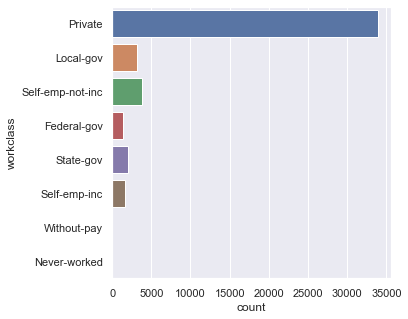

In [11]:
sns.countplot(y=data['workclass'])

<p> Most of the people want to work in private sector</p>

C:\Users\luhar\AppData\Local\Temp/ipykernel_14864/3273003757.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.set_xticklabels(xlabel,rotation=90)


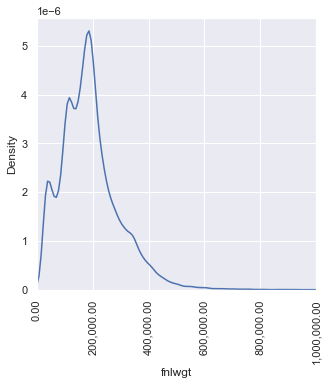

In [12]:
pl=sns.kdeplot(x=data['fnlwgt'])
pl.set(xlim=(0,1000000))
xlabel=['{:,.2f}'.format(x) for x in pl.get_xticks()]
pl.set_xticklabels(xlabel,rotation=90)
plt.show()

In [13]:
out1=[]
def outlier(data):
    mean=np.mean(data)
    std=np.std(data)
    for i in data: 
        z = (i-mean)/std
        if np.abs(z) > 3: 
            out1.append(i)
    print("Outliers are saved in 'out1' variables. Total length of outliers are",len(out1))
outlier(data['fnlwgt'])

Outliers are saved in 'out1' variables. Total length of outliers are 506


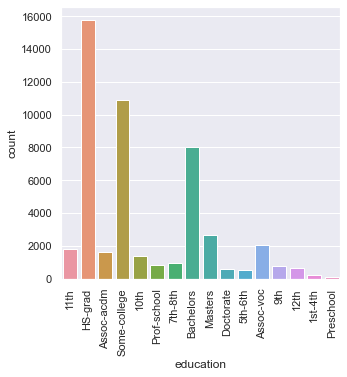

In [14]:
pl=sns.countplot(x=data['education'])
labels=data['education'].unique()
pl.set_xticklabels(labels,rotation=90)
plt.show()

<p> Most adult started earning after gradution, college, or after taking bachelors degree.</p>
<b>NOTE:</b> Here, column educational-num is same as column 'education. It is just label encoding of that column.

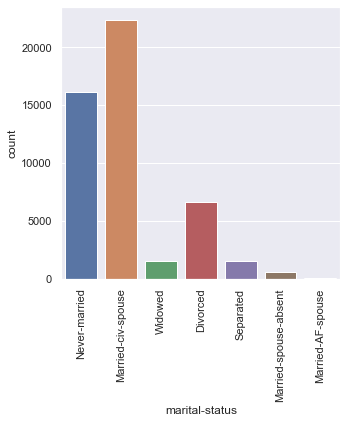

In [15]:
pl=sns.countplot(x=data['marital-status'])
labels=data['marital-status'].unique()
pl.set_xticklabels(labels,rotation=90)
plt.show()

Countplot of column  occupation


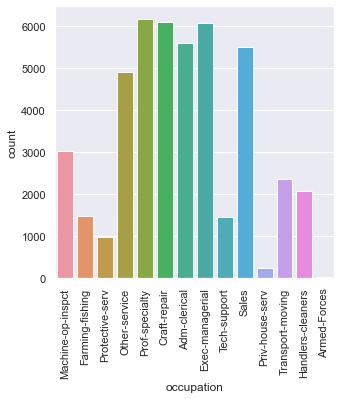

Countplot of column  relationship



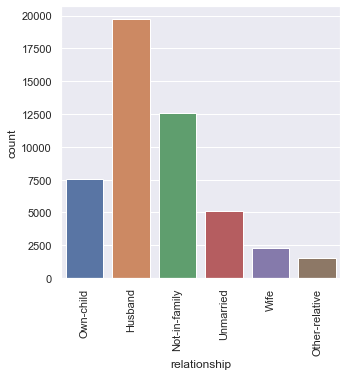

Countplot of column  race



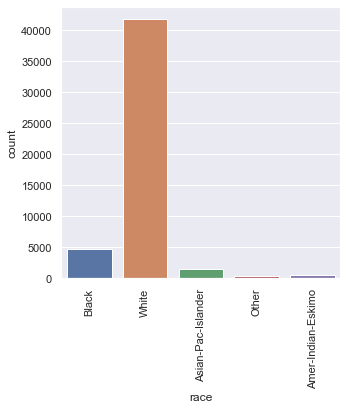

Countplot of column  gender



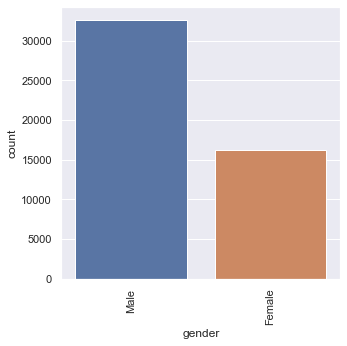

Countplot of column  native-country


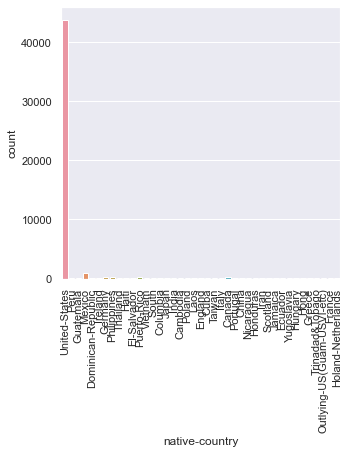

Countplot of column  income



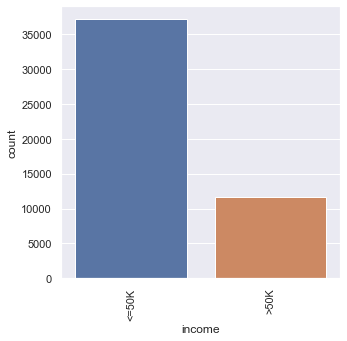

In [16]:
for i in ['occupation','relationship','race','gender','native-country','income']:
    print("Countplot of column ",i)
    pl=sns.countplot(x=data[i])
    labels=data[i].unique()
    labels=list(labels)
    try:
        labels.remove(np.nan)
    except:
        print()
    pl.set_xticklabels(labels,rotation=90)
    plt.show()

<li>The data is taken for united state </li>
<li> Dataset contains more details for Male.</li>
<li> Many of the person is having the income <=50k</li>

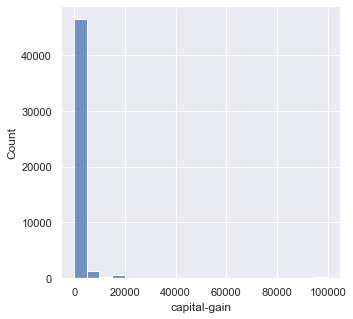

In [17]:
sns.histplot(data['capital-gain'],bins=20)
plt.show()

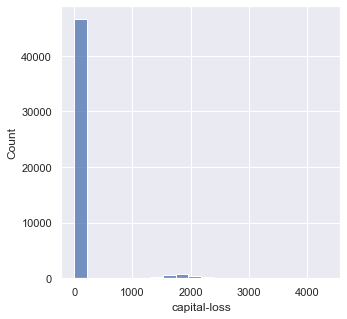

In [18]:
sns.histplot(data['capital-loss'],bins=20)
plt.show()

<p> It is hard to decide effect of capital-gain and capital loss on the salary. We will try to extract info from bivariate analysis</p>

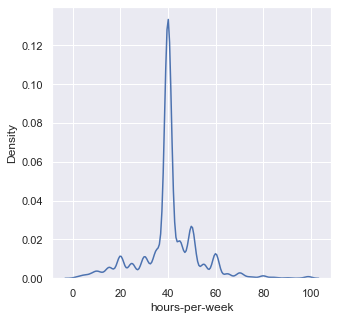

In [19]:
sns.kdeplot(data['hours-per-week'],)
plt.show()

<AxesSubplot:xlabel='hours-per-week'>

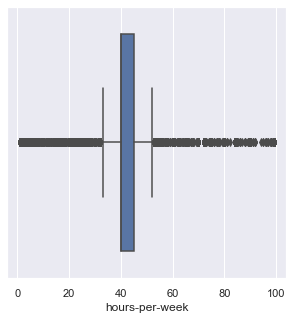

In [20]:
sns.boxplot(x=data['hours-per-week'])

In [21]:
print("Total outliers in the 'hours-per-week' columns are")
outlier(data['hours-per-week'])

Total outliers in the 'hours-per-week' columns are
Outliers are saved in 'out1' variables. Total length of outliers are 1187


In [22]:
numerical_data=data.filter(['age','fnlwgt','capital-gain','capital-loss','hours-per-week'], axis=1)

In [23]:
categorical_data=data.filter(['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country','income'], axis=1)

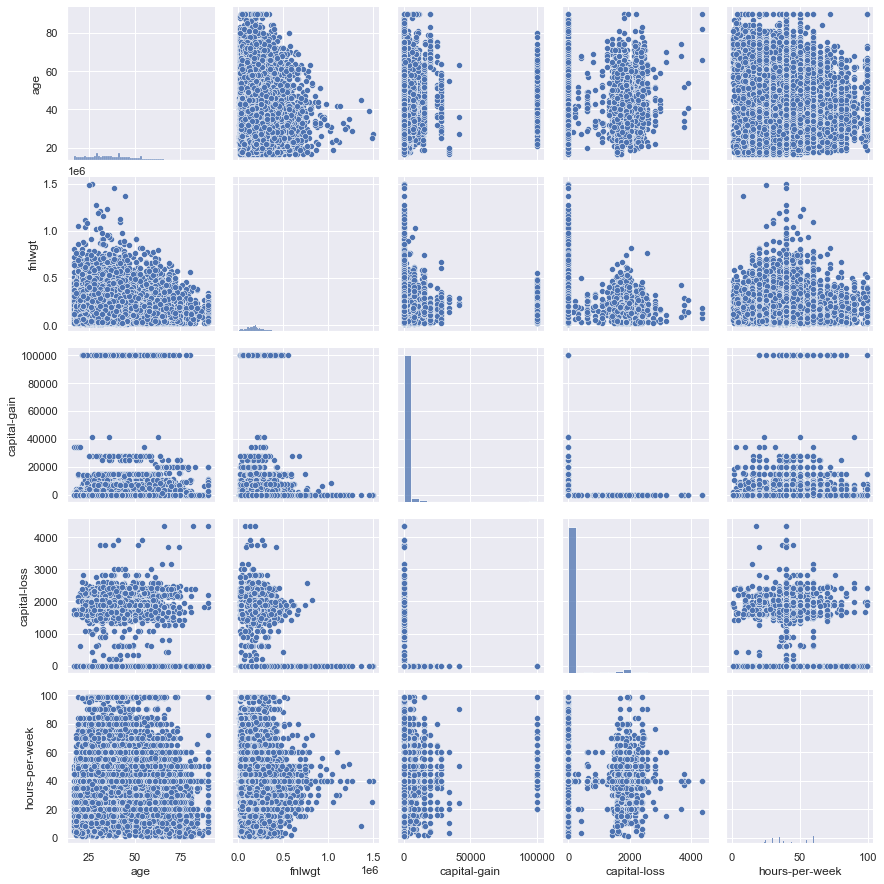

In [24]:
sns.pairplot(numerical_data,)

<li> Person having more age less likely to work for more than 60 hrs per week.</li>

<h2>Bivariate Analysis</h2>

<AxesSubplot:xlabel='capital-gain', ylabel='capital-loss'>

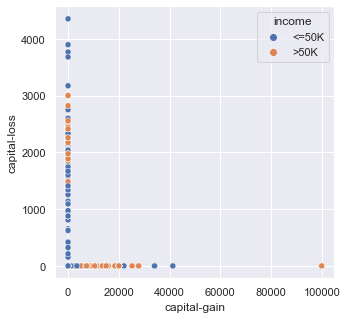

In [25]:
sns.scatterplot(x=data['capital-gain'],y=data['capital-loss'],hue=data['income'])

In [26]:
data['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

<p> Person having capital loss or low capital gain are more likely income<=50k. </p>

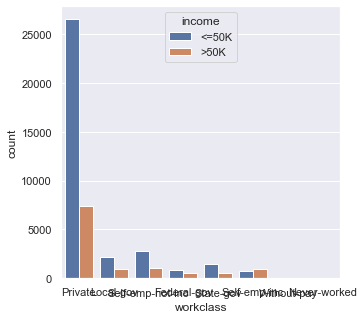

In [27]:
pl=sns.countplot(x=data['workclass'],hue=data['income'])

<p>person working in corporate have getting more likely to get>50k </p>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

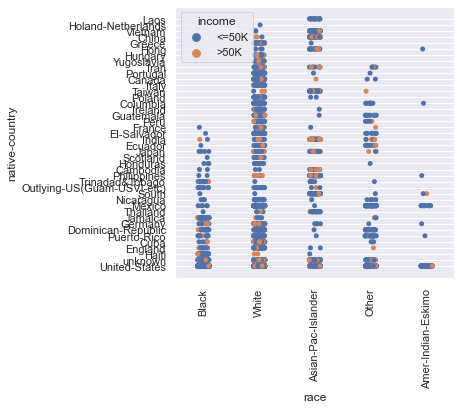

In [28]:
data['native-country'].replace(np.nan,'unknown',inplace=True)
sns.stripplot(x=data['race'],y=data['native-country'],hue=data['income'])
plt.xticks(rotation=90)

C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt', ylabel='race'>

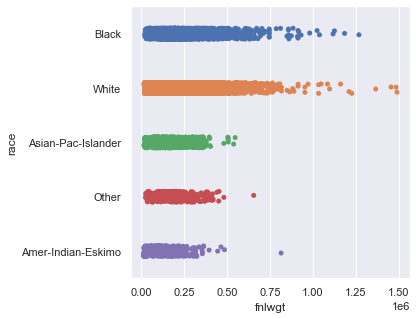

In [29]:
sns.stripplot(data['fnlwgt'],data['race'])

<AxesSubplot:xlabel='hours-per-week', ylabel='age'>

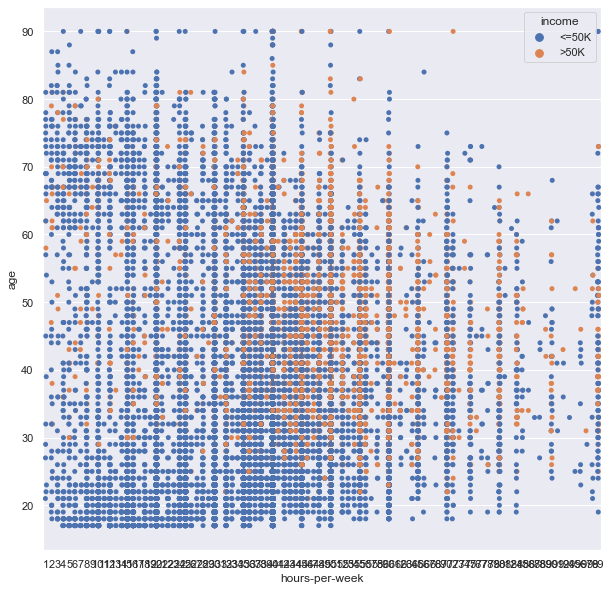

In [30]:
sns.set(rc={'figure.figsize':(10,10)})
sns.stripplot(x=data['hours-per-week'],y=data['age'],hue=data['income'],)

<p>Person working for more than 40 hr per week have income >50k </p>

In [31]:
import math
def logi(x):
    return math.log2(x)
def sqrt(x):
    return math.sqrt(x)
def cuberoot(x):
    return math.pow(x,0.3333)
def reci(x):
    return 1/x

<AxesSubplot:xlabel='age'>

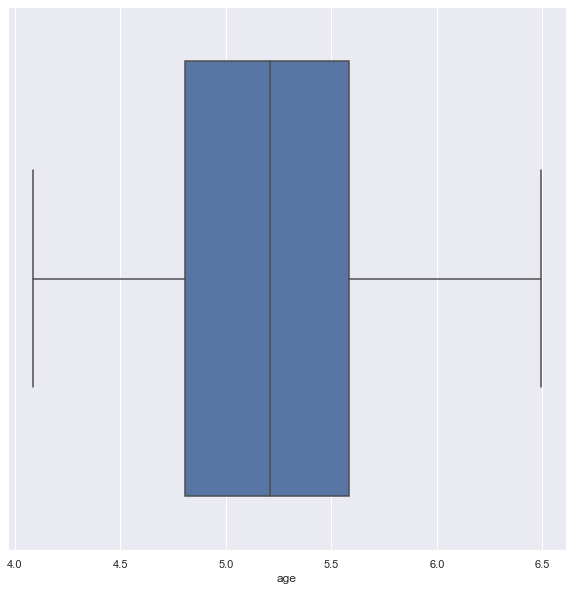

In [32]:
#treatment with outliers
data_copy['age']=data_copy['age'].apply(logi)
sns.boxplot(x=data_copy['age'])

In [33]:
data_copy=data.copy()

In [34]:
from statistics import mode

In [35]:
data_copy['workclass'].replace(np.nan,mode(data_copy['workclass']),inplace=True)

<AxesSubplot:xlabel='fnlwgt'>

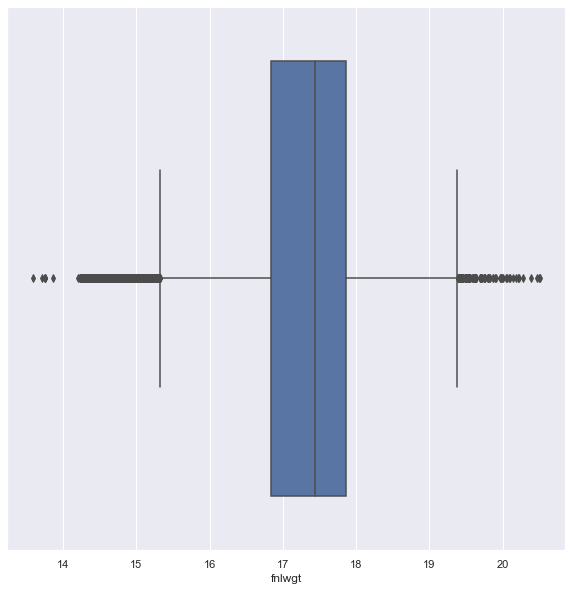

In [36]:
data_copy['fnlwgt']=data_copy['fnlwgt'].apply(logi)
sns.boxplot(x=data_copy['fnlwgt'])

In [37]:
index1=data_copy[data_copy['fnlwgt']<=14.5].index
mean=np.mean(data_copy['fnlwgt'])
index2=data_copy[data_copy['fnlwgt']>=19.5].index
index1=index1.append(index2)

In [38]:
for i in index1:
    data_copy.loc[i,'fnlwgt']=mean

<AxesSubplot:xlabel='fnlwgt'>

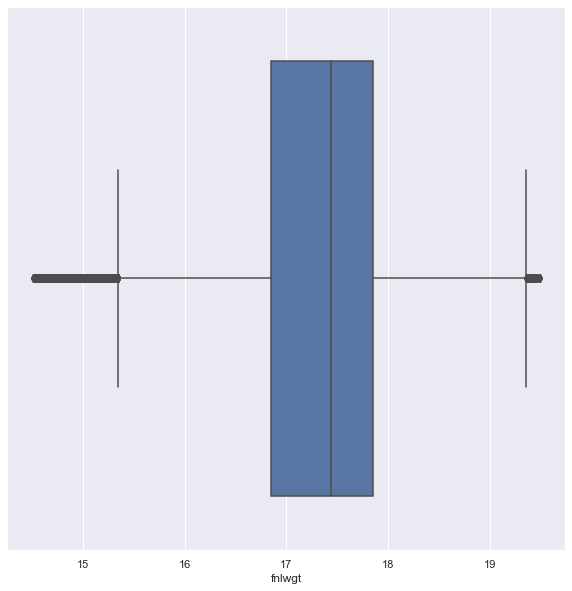

In [39]:
sns.boxplot(x=data_copy['fnlwgt'])

In [40]:
# replace all missing value with mode
data_copy['occupation'].replace(np.nan,mode(data_copy['occupation']),inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
a=LabelEncoder()
for i in data_copy.columns:
    if data_copy[i].dtype=='O':
        data_copy[i]=a.fit_transform(data_copy[i])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test =train_test_split(data_copy.iloc[:,:-1],data_copy['income'],test_size=0.25,random_state=42)

In [45]:
print kjlkl

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(kjlkl)? (Temp/ipykernel_14864/1520665805.py, line 1)

<h3>Logistic Regression</h3>

In [ ]:
param_grid={'C':[0.1,0.15,0.2,0.4],'solver':['lbfgs','liblinear','saga','newton-cg']}
lr_model=LogisticRegression()
final_model_lr=GridSearchCV(lr_model,param_grid=param_grid,n_jobs=3,cv=5)
final_model_lr.fit(X_train,y_train)
print(final_model_lr.best_params_)
print(final_model_lr.best_score_)

In [ ]:
y_pred=final_model_lr.predict(X_test)

In [47]:
def print_report(y_test,y_pred):
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Mean Sqaured Error:",mean_squared_error(y_test,y_pred))
    print("Classification Report:",classification_report(y_test,y_pred))   

In [ ]:
print_report(y_test,y_pred)

<h3>Gaussian Naive Byes </h3> 

In [ ]:
param_grid={'var_smoothing':[1e-9,1e-11]}
nb_model=GaussianNB()
final_model_nb=GridSearchCV(nb_model,param_grid=param_grid,n_jobs=3,cv=5)
final_model_nb.fit(X_train,y_train)
print(final_model_nb.best_params_)
print(final_model_nb.best_score_)

In [ ]:
y_pred=final_model_nb.predict(X_test)

In [ ]:
print_report(y_test,y_pred)

<h3> KNN Classfier </h3>

In [ ]:
param_grid={'n_neighbors':[3,5],'weights':['uniform','distance'],'algorithm':['auto', 'brute']}
knn_model=KNeighborsClassifier()
final_model_knn=GridSearchCV(knn_model,param_grid=param_grid,n_jobs=1,cv=3)
final_model_knn.fit(X_train,y_train)
print(final_model_knn.best_params_)
print(final_model_knn.best_score_)

In [ ]:
y_pred=final_model_knn.predict(X_test)
print_report(y_test,y_pred)

<h3>Decision Tree</h3>

In [54]:
param_grid={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[7,8,9,10,11],'min_samples_split':[3,4,5,6,7]}
dt_model=DecisionTreeClassifier()
final_model_dt=GridSearchCV(dt_model,param_grid=param_grid,n_jobs=3,cv=5)
final_model_dt.fit(X_train,y_train)
print(final_model_dt.best_params_)
print(final_model_dt.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 3, 'splitter': 'best'}
0.8536487304332262


In [ ]:
y_pred=final_model_dt.predict(X_test)
print_report(y_test,y_pred)

<h3> Adaboosting of DT </h3>

In [61]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=3,splitter='best')
final_model_dt=AdaBoostClassifier(dt_model,n_estimators=15)
final_model_dt.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         min_samples_split=3),
                   n_estimators=15)

In [62]:
y_pred=final_model_dt.predict(X_test)
print_report(y_test,y_pred)

Accuracy Score: 0.856850380804193
Mean Sqaured Error: 0.14314961919580707
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.92      0.91      9354
           1       0.71      0.67      0.69      2857

    accuracy                           0.86     12211
   macro avg       0.80      0.79      0.80     12211
weighted avg       0.85      0.86      0.86     12211



<h2> Result </h2>

<table>
<thead>
<tr>
<th>Model</th>
<th>Accuracy</th>
<th>Error</th>
</tr>
</thead>
<tbody>
<tr>
<td>Logistic Regression</td>
<td>0.830</td>
<td>0.167</td>
</tr>
<tr>
<td>Gaussian NB</td>
<td>0.81</td>
<td>0.19</td>
</tr>
<tr>
<td>KNN</td>
<td>0.8412</td>
<td>0.1587</td>
</tr>
<tr>
<td>DT</td>
<td>0.863</td>
<td>0.1369</td>
</tr>
<tr>
<td>Adaboost+DT</td>
<td>0.86</td>
<td>0.14</td>
</tr>
</tbody>
</table>